In [8]:
from Resources.lib import *
from Resources import lib as lib

In [9]:
###----------------
### Some parameters
###----------------

inpDir = './upload'
outDir = '../DATA'
subDir = 'csvs'
audDir = "AUDIO"

RANDOM_STATE = 24               # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)    # Set Random Seed for reproducible  results

EPOCHS = 11                     # number of epochs
ALPHA = 0.001                   # learning rate
NUM_SAMPLES = 1280              # How many samples we want to generate 
NOISE = 0.2                     # Noise to be introduced in the data
TEST_SIZE = 0.2
BATCH_SIZE = 26
PATIENCE = 20

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

In [89]:
df = pd.read_csv("./DATA/csvs/Obama-to-Trump_FAKE.csv")
df = df.reset_index()

In [90]:
df

,index,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0,0.318201,0.035020,3065.745194,2612.185396,6128.153853,0.153431,-307.85600,55.697018,-17.379436,...,-16.165169,5.405939,2.549457,-5.112835,-0.544781,-12.065888,-1.423916,-13.294633,-6.527376,FAKE
1,1,0.485404,0.001413,2198.233964,2432.632174,4381.517445,0.105169,-500.68866,102.653366,-16.533148,...,-1.617074,6.602706,4.180027,1.369403,3.928801,-5.393010,-1.239054,-7.340294,1.440183,FAKE
2,2,0.551631,0.028426,2064.519562,2241.802146,3640.334806,0.110873,-446.95303,68.518830,3.167167,...,-1.530157,-2.828733,2.390953,7.014152,7.069071,-3.359785,-2.954807,-4.916270,-2.155269,FAKE
3,3,0.261755,0.064631,2105.320719,2339.191843,4132.172741,0.073464,-296.35320,81.210450,-3.549155,...,-13.572388,-8.630247,-0.499472,-4.775998,2.591343,-13.655369,-4.985857,-10.444016,-8.177310,FAKE
4,4,0.213219,0.080373,2662.924633,2729.530399,5498.307662,0.101196,-234.19562,47.477127,-14.037437,...,-22.433916,-7.057376,0.092570,-5.931805,3.295625,-16.614754,-3.367248,-14.248423,-10.043166,FAKE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,0.529265,0.000707,2028.525797,2479.323303,4375.155362,0.076749,-568.84840,107.816574,-5.137602,...,2.594823,-1.932425,0.252002,0.179408,0.435652,-3.669945,0.803377,-2.939240,-0.092321,FAKE
596,596,0.325437,0.003105,1921.683521,2082.285528,3689.763295,0.093850,-453.04553,112.656230,-32.079224,...,-5.593739,0.452518,5.767397,1.302976,-0.954953,-2.310495,5.190651,-5.392072,-3.328121,FAKE
597,597,0.465283,0.007240,1762.895578,1671.399238,3117.420543,0.099432,-374.81183,119.899790,-63.249557,...,-9.603080,3.404631,16.177050,-2.965148,-9.467863,-3.318303,4.828074,-6.467795,-0.744244,FAKE
598,598,0.465095,0.008305,1951.899813,1802.785408,3309.751199,0.106434,-357.91193,97.499120,-83.554210,...,-5.076159,-2.959461,4.662685,3.482278,-1.149203,-2.839118,8.388673,2.884281,-0.787594,FAKE


In [91]:
dScaler = StandardScaler()
df = pd.DataFrame(dScaler.fit_transform(df.iloc[:,1:-1]))

KeyboardInterrupt: 

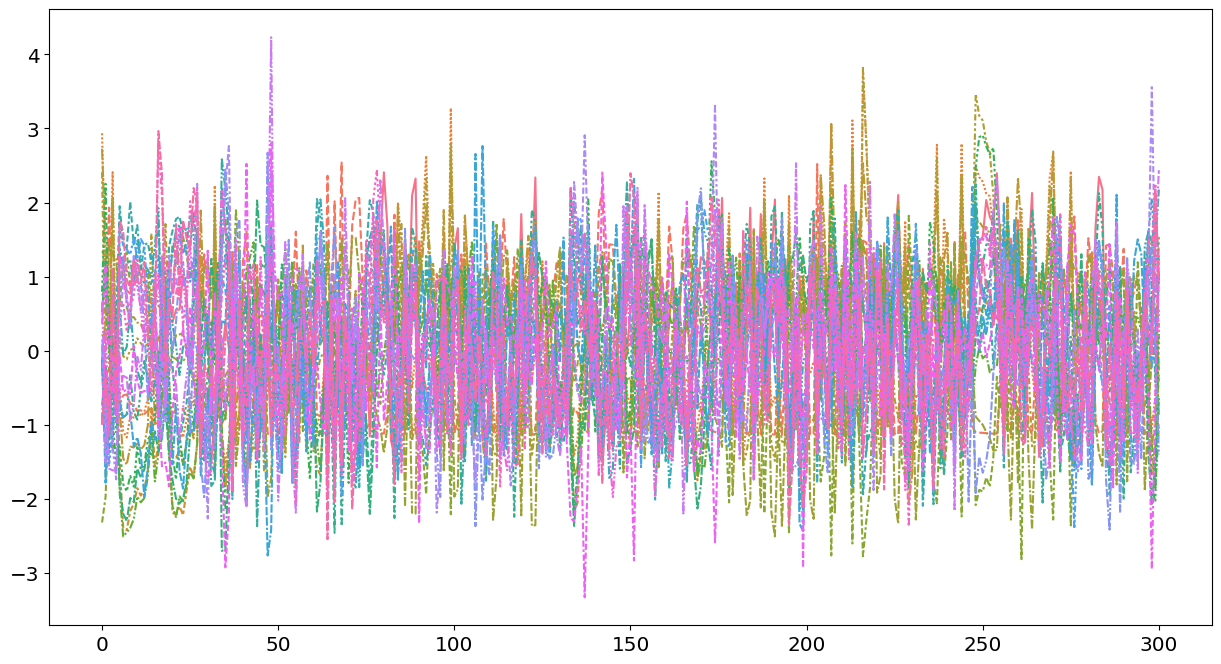

In [113]:
def create_images_from_csv_dir(input_dir = str() , output_dir = str() , length = int()):
    files = os.listdir(input_dir)
    for file in files:
        filename = file.strip(".csv")
        os.mkdir(f"{output_dir}/{filename}")

        for i in range(length,len(df),length):
            data = pd.DataFrame(df.iloc[i-1:i+length,:-1])
            data = data.reset_index()
            data = data.drop(columns='index')
            ax = sns.lineplot(data , legend=False)
            plt.savefig(f"{output_dir}/{filename}/{filename}{i}.png")
            plt.close()
    return None


create_images_from_csv_dir("./DATA/csvs/" , "./images" , 300)

In [103]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 7.1 MB/s eta 0:00:00m eta 0:00:010:00:01m
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
